In [1]:
import numpy as np
import pandas as pd

In [2]:
from zipfile import ZipFile

In [3]:
import zipfile

In [12]:
zip_folder_img= "B:\zip_img.zip"

# Specify the directory where you want to extract the contents
extracted_dir = "B:/"

# Unzip the contents of the zip file folder
with zipfile.ZipFile(zip_folder_img, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)  

In [4]:
import os

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os

In [3]:
from matplotlib import pyplot as plt
from matplotlib import image
from PIL import Image

In [17]:
label=[]
target=[]
file="B:/Ext_img/"
os.listdir(file)
for files in os.listdir(file):
    for file_1 in os.listdir(os.path.join(file,files)):
        file_2=os.path.join(os.path.join(file,files),file_1)
        img=Image.open(file_2)
        img1=img.resize((8,8))
        img2=np.array(img1).ravel()
        label.append(img2)
        target.append(files)

In [15]:
file="B:/Ext_img/"

In [16]:
os.listdir(file)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [18]:
df=pd.DataFrame(label,columns=["pixel"+ str(i) for i in range(0,64)])
df["label"]=target

In [19]:
df.shape

(372451, 65)

In [20]:
df["label"].value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: label, dtype: int64

In [23]:
data=df.to_csv("ML_Img_project.csv")

In [24]:
data=pd.read_csv("ML_Img_project.csv")

In [25]:
data.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,A
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,A
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,A
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [26]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [27]:
data.shape

(372451, 65)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Data columns (total 65 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   pixel0   372451 non-null  int64 
 1   pixel1   372451 non-null  int64 
 2   pixel2   372451 non-null  int64 
 3   pixel3   372451 non-null  int64 
 4   pixel4   372451 non-null  int64 
 5   pixel5   372451 non-null  int64 
 6   pixel6   372451 non-null  int64 
 7   pixel7   372451 non-null  int64 
 8   pixel8   372451 non-null  int64 
 9   pixel9   372451 non-null  int64 
 10  pixel10  372451 non-null  int64 
 11  pixel11  372451 non-null  int64 
 12  pixel12  372451 non-null  int64 
 13  pixel13  372451 non-null  int64 
 14  pixel14  372451 non-null  int64 
 15  pixel15  372451 non-null  int64 
 16  pixel16  372451 non-null  int64 
 17  pixel17  372451 non-null  int64 
 18  pixel18  372451 non-null  int64 
 19  pixel19  372451 non-null  int64 
 20  pixel20  372451 non-null  int64 
 21  pixel21  3

In [30]:
data["label"].value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: label, dtype: int64

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='label', ylabel='count'>

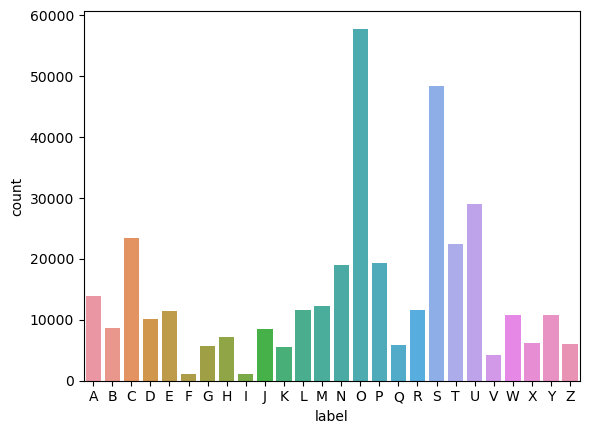

In [32]:
sns.countplot(data=data,x="label")

In [33]:
X=data.drop("label",axis=1)
y=df["label"]

# Data Split into Train and Test

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

# BUILDING THE MODEL

## `Logistic Regression`

In [36]:
%%time
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()
lrc.fit(X_train,y_train)

Wall time: 32.1 s


B:\Data Science doc\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score,classification_report

In [38]:
%%time
y_pred_lrc=lrc.predict(X_test)
y_pred_lrc

Wall time: 128 ms


array(['N', 'S', 'O', ..., 'E', 'A', 'O'], dtype=object)

In [39]:
accuracy_score(y_test,y_pred_lrc)

0.4376617658114334

In [40]:
confusion_matrix(y_test,y_pred_lrc)

array([[ 1354,    22,    53,     5,    50,     4,     6,    74,     3,
           14,    10,    63,   137,   310,   332,   171,    34,   187,
          256,    77,   115,     5,    19,    66,    91,    17],
       [   91,   422,    79,   115,    84,     0,    28,    20,     0,
           13,     4,    36,    76,    50,   290,   164,     8,    55,
          382,    52,    62,     4,    28,    16,    37,    35],
       [   44,   177,  2084,    15,   190,     9,   114,    10,     5,
           84,     4,   129,    95,    45,  1311,    65,    54,    66,
          874,    71,   414,     3,    33,     2,    35,    18],
       [   52,   100,    59,   470,    32,     0,    28,     4,     0,
           18,     4,    50,   120,    55,   790,   134,    15,    13,
          218,    93,    94,     9,    78,     6,    41,    31],
       [   84,   103,   161,    22,   589,     4,    22,    31,     2,
           32,    14,    87,    57,   115,   414,   164,    19,    96,
          477,   161,   107,  

In [41]:
temp_df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred_lrc})
temp_df.head(10)

,Actual,Predicted
129113,N,N
250873,S,S
89920,J,O
97176,L,M
136486,N,K
218406,Q,Q
89153,J,O
103427,L,O
254515,S,G
203992,P,W


<AxesSubplot:xlabel='label', ylabel='Count'>

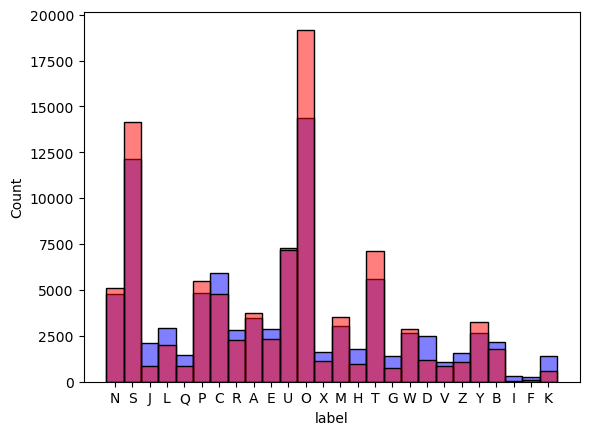

In [56]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_lrc,color='red',alpha=0.5)

In [49]:
print(classification_report(y_test,y_pred_lrc))

              precision    recall  f1-score   support

           A       0.36      0.39      0.37      3475
           B       0.24      0.20      0.21      2151
           C       0.44      0.35      0.39      5951
           D       0.40      0.19      0.25      2514
           E       0.25      0.20      0.23      2876
           F       0.15      0.05      0.08       284
           G       0.22      0.12      0.15      1408
           H       0.23      0.12      0.16      1799
           I       0.34      0.07      0.11       315
           J       0.25      0.10      0.14      2133
           K       0.40      0.17      0.23      1381
           L       0.37      0.25      0.30      2914
           M       0.45      0.53      0.49      3013
           N       0.39      0.42      0.41      4777
           O       0.54      0.72      0.62     14346
           P       0.46      0.53      0.49      4818
           Q       0.33      0.19      0.24      1458
           R       0.36    

## `KNN Clasification`

In [50]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(X_train,y_train)

Wall time: 1.19 s


KNeighborsClassifier()

In [51]:
%%time
y_pred_knc=lrc.predict(X_test)
y_pred_knc

Wall time: 185 ms


array(['N', 'S', 'O', ..., 'E', 'A', 'O'], dtype=object)

In [52]:
accuracy_score(y_test,y_pred_knc)

0.4376617658114334

In [53]:
temp_df1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred_knc})
temp_df1.head(10)

,Actual,Predicted
129113,N,N
250873,S,S
89920,J,O
97176,L,M
136486,N,K
218406,Q,Q
89153,J,O
103427,L,O
254515,S,G
203992,P,W


<AxesSubplot:xlabel='label', ylabel='Count'>

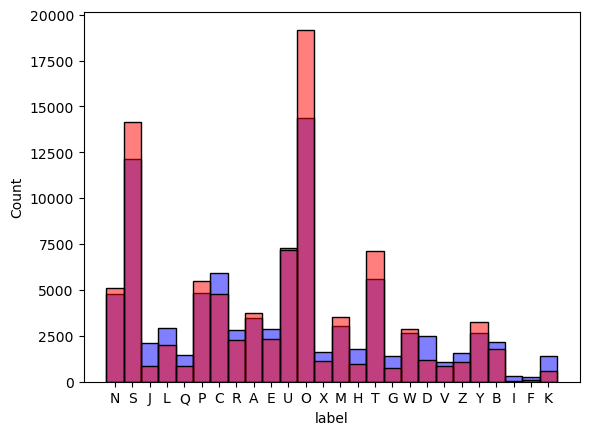

In [55]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_knc,color='red',alpha=0.5)

## `Decision Tree Classification`

In [57]:
%%time
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

Wall time: 22.2 s


DecisionTreeClassifier()

In [58]:
y_pred_dt=dt.predict(X_test)
y_pred_dt

array(['N', 'S', 'J', ..., 'E', 'A', 'O'], dtype=object)

In [59]:
accuracy_score(y_test,y_pred_dt)

0.926229420166894

In [60]:
temp_df2=pd.DataFrame({"Actual":y_test,"Predicted":y_pred_dt})
temp_df2.head(10)

,Actual,Predicted
129113,N,N
250873,S,S
89920,J,J
97176,L,L
136486,N,K
218406,Q,Q
89153,J,J
103427,L,L
254515,S,S
203992,P,P


<AxesSubplot:xlabel='label', ylabel='Count'>

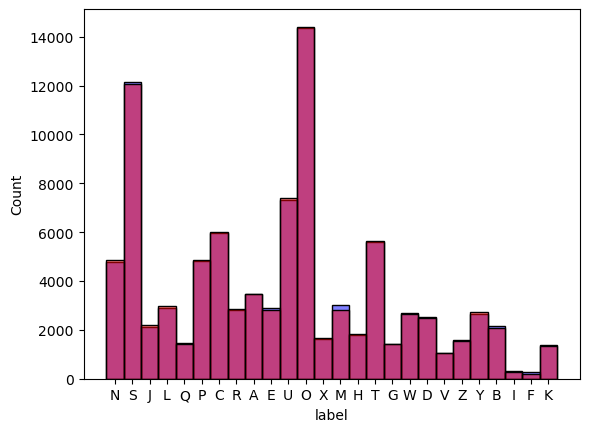

In [61]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_dt,color='red',alpha=0.5)

In [63]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           A       0.90      0.90      0.90      3475
           B       0.85      0.82      0.84      2151
           C       0.93      0.95      0.94      5951
           D       0.88      0.87      0.87      2514
           E       0.88      0.86      0.87      2876
           F       0.80      0.59      0.68       284
           G       0.85      0.85      0.85      1408
           H       0.83      0.85      0.84      1799
           I       0.79      0.73      0.76       315
           J       0.88      0.90      0.89      2133
           K       0.85      0.83      0.84      1381
           L       0.94      0.95      0.94      2914
           M       0.91      0.85      0.88      3013
           N       0.90      0.92      0.91      4777
           O       0.97      0.98      0.97     14346
           P       0.95      0.95      0.95      4818
           Q       0.85      0.83      0.84      1458
           R       0.88    

## `GaussianNB Classification`

In [73]:
%%time
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

Wall time: 843 ms


GaussianNB()

In [67]:
y_pred_gnb=gnb.predict(X_test)
y_pred_gnb

array(['N', 'O', 'O', ..., 'S', 'S', 'O'], dtype='<U1')

In [68]:
accuracy_score(y_test,y_pred_gnb)

0.441796526800769

In [69]:
temp_df3=pd.DataFrame({"Actual":y_test,"Predicted":y_pred_gnb})
temp_df3.head(10)

,Actual,Predicted
129113,N,N
250873,S,O
89920,J,O
97176,L,M
136486,N,O
218406,Q,Q
89153,J,O
103427,L,L
254515,S,S
203992,P,A


<AxesSubplot:xlabel='label', ylabel='Count'>

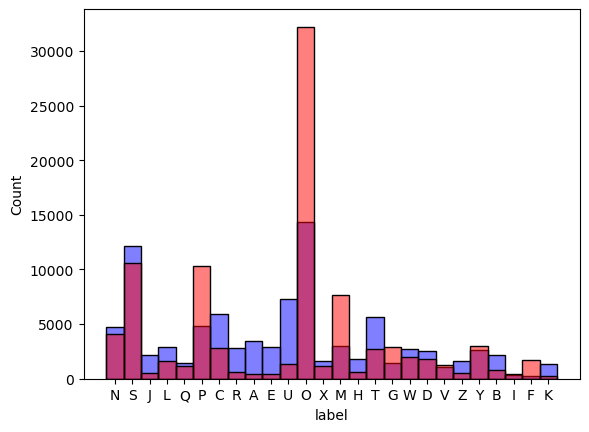

In [70]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_gnb,color='red',alpha=0.5)

In [71]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           A       0.34      0.04      0.07      3475
           B       0.38      0.14      0.20      2151
           C       0.68      0.32      0.43      5951
           D       0.49      0.35      0.41      2514
           E       0.50      0.08      0.14      2876
           F       0.14      0.88      0.25       284
           G       0.19      0.40      0.26      1408
           H       0.18      0.07      0.10      1799
           I       0.49      0.74      0.59       315
           J       0.45      0.11      0.17      2133
           K       0.41      0.08      0.13      1381
           L       0.62      0.34      0.44      2914
           M       0.35      0.88      0.50      3013
           N       0.44      0.37      0.40      4777
           O       0.40      0.90      0.56     14346
           P       0.41      0.88      0.56      4818
           Q       0.42      0.34      0.38      1458
           R       0.67    

## `Random Forest Classification`

In [72]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

Wall time: 2min 31s


RandomForestClassifier()

In [74]:
y_pred_rfc=rfc.predict(X_test)
y_pred_rfc

array(['N', 'S', 'J', ..., 'E', 'A', 'O'], dtype=object)

In [75]:
accuracy_score(y_test,y_pred_rfc)

0.974343002588253

In [76]:
temp_df4=pd.DataFrame({"Actual":y_test,"Predicted":y_pred_rfc})
temp_df4.head(10)

,Actual,Predicted
129113,N,N
250873,S,S
89920,J,J
97176,L,L
136486,N,K
218406,Q,Q
89153,J,J
103427,L,L
254515,S,S
203992,P,P


<AxesSubplot:xlabel='label', ylabel='Count'>

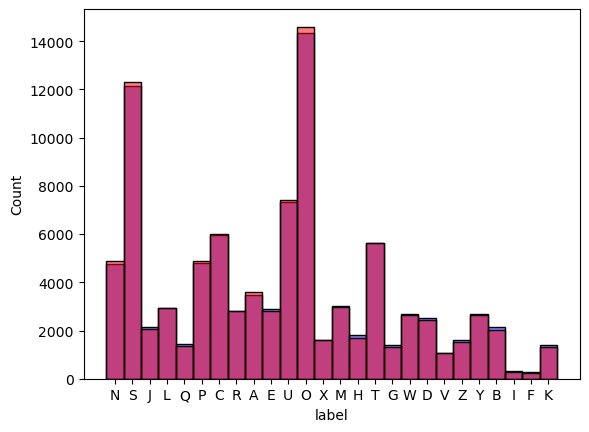

In [77]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_rfc,color='red',alpha=0.5)

In [78]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           A       0.94      0.98      0.96      3475
           B       0.97      0.91      0.94      2151
           C       0.98      0.99      0.98      5951
           D       0.96      0.93      0.95      2514
           E       0.97      0.95      0.96      2876
           F       0.99      0.81      0.89       284
           G       0.97      0.92      0.94      1408
           H       0.97      0.92      0.94      1799
           I       1.00      0.86      0.93       315
           J       0.98      0.94      0.96      2133
           K       0.96      0.92      0.94      1381
           L       0.98      0.99      0.99      2914
           M       0.97      0.95      0.96      3013
           N       0.96      0.98      0.97      4777
           O       0.98      1.00      0.99     14346
           P       0.97      0.99      0.98      4818
           Q       0.98      0.91      0.94      1458
           R       0.96    

## `AdaBoost Classification`

In [79]:
%%time
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)

Wall time: 1min 5s


AdaBoostClassifier()

In [80]:
y_pred_abc=abc.predict(X_test)
y_pred_abc

array(['M', 'O', 'U', ..., 'E', 'A', 'C'], dtype=object)

In [82]:
accuracy_score(y_test,y_pred_abc)

0.5538217005144287

In [83]:
temp_df5=pd.DataFrame({"Actual":y_test,"Predicted":y_pred_abc})
temp_df5.head(10)

,Actual,Predicted
129113,N,M
250873,S,O
89920,J,U
97176,L,S
136486,N,K
218406,Q,Q
89153,J,U
103427,L,C
254515,S,S
203992,P,P


<AxesSubplot:xlabel='label', ylabel='Count'>

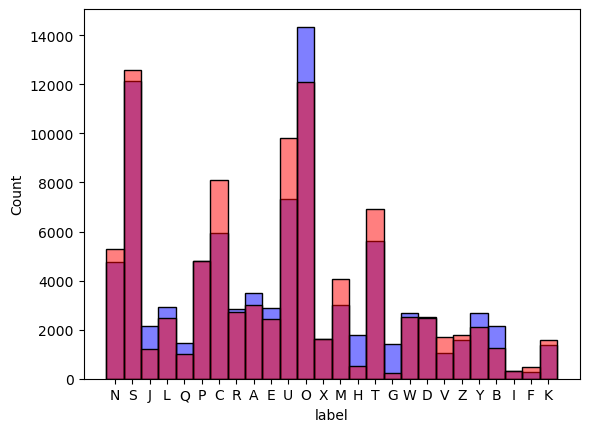

In [84]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_pred_abc,color='red',alpha=0.5)

In [85]:
print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

           A       0.53      0.46      0.50      3475
           B       0.33      0.19      0.24      2151
           C       0.42      0.58      0.49      5951
           D       0.30      0.29      0.29      2514
           E       0.43      0.36      0.39      2876
           F       0.36      0.63      0.46       284
           G       0.44      0.07      0.13      1408
           H       0.35      0.10      0.15      1799
           I       0.57      0.57      0.57       315
           J       0.45      0.26      0.33      2133
           K       0.41      0.47      0.43      1381
           L       0.52      0.44      0.48      2914
           M       0.42      0.56      0.48      3013
           N       0.42      0.47      0.45      4777
           O       0.79      0.66      0.72     14346
           P       0.64      0.64      0.64      4818
           Q       0.50      0.35      0.41      1458
           R       0.48    

In [87]:
model=[("Logistic Regression",accuracy_score(y_test,y_pred_lrc)),("KNN Classification",accuracy_score(y_test,y_pred_knc)),
       ("Decision Tree Classification",accuracy_score(y_test,y_pred_dt)),("GaussianNB Classification",accuracy_score(y_test,y_pred_gnb)),
       ("Random Forest Classification",accuracy_score(y_test,y_pred_rfc)),("Ada Boost Classification",accuracy_score(y_test,y_pred_abc))]
    

In [88]:
predict=pd.DataFrame(data=model,columns=["Algorithm","Accuracy_Score"],index=[1,2,3,4,5,6])
predict.sort_values(by='Accuracy_Score',ascending=False)

,Algorithm,Accuracy_Score
5,Random Forest Classification,0.974343
3,Decision Tree Classification,0.926229
6,Ada Boost Classification,0.553822
4,GaussianNB Classification,0.441797
1,Logistic Regression,0.437662
2,KNN Classification,0.437662


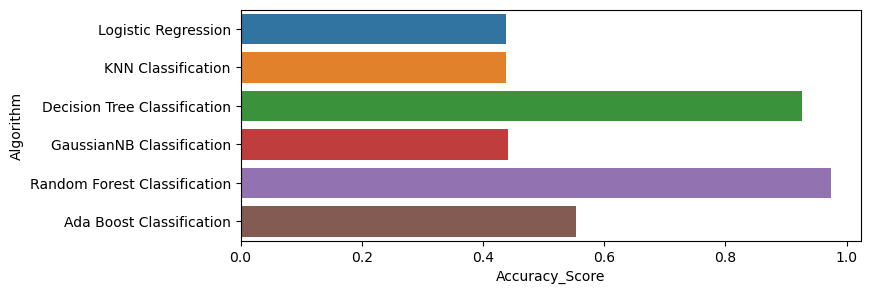

In [89]:
plt.figure(figsize=(8,3))
sns.barplot(x=predict['Accuracy_Score'],y=predict['Algorithm'])
plt.show()

## `Conclusion:`

### `from the above model it has been seen that Random Forest achieve highest accuracy with 97.4 % and Decision Tree is 92.6 %.`